# Ejercicio 1

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Cargar los datos
df = pd.read_csv('plane_routes_with_coordinates.csv')

# Crear mapa base
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Agrupar marcadores para mejor visualización
marker_cluster = MarkerCluster().add_to(world_map)

# Diccionario para almacenar aeropuertos ya procesados
processed_airports = {}

# Procesar cada ruta
for idx, row in df.iterrows():
    # Coordenadas de origen y destino
    source_coords = (row['source lat'], row['source lon'])
    dest_coords = (row['destination lat'], row['destination lon'])
    
    # Solo procesar si las coordenadas son válidas (no 0,0)
    if source_coords != (0.0, 0.0) and dest_coords != (0.0, 0.0):
        # Aeropuerto de origen
        if row['source airport'] not in processed_airports:
            folium.Marker(
                location=source_coords,
                popup=f"{row['source airport name']}, {row['source city']}, {row['source country']}",
                tooltip=row['source airport'],
                icon=folium.Icon(color='blue', icon='plane', prefix='fa')
            ).add_to(marker_cluster)
            processed_airports[row['source airport']] = True
        
        # Aeropuerto de destino
        if row['destination airport'] not in processed_airports:
            folium.Marker(
                location=dest_coords,
                popup=f"{row['destination airport name']}, {row['destination city']}, {row['destination country']}",
                tooltip=row['destination airport'],
                icon=folium.Icon(color='green', icon='plane', prefix='fa')
            ).add_to(marker_cluster)
            processed_airports[row['destination airport']] = True
        
        # Línea de ruta
        folium.PolyLine(
            locations=[source_coords, dest_coords],
            color='gray',
            weight=1,
            opacity=0.5,
            tooltip=f"{row['source airport']} to {row['destination airport']}"
        ).add_to(world_map)

# Mostrar el mapa
world_map.save('world_airport_operations.html')
world_map

# Ejercicio 2

In [3]:
import pandas as pd
import plotly.express as px

# Cargar datos
df = pd.read_csv("./nuclear-power-plants.csv")

# Crear figura con Plotly Express
fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    hover_name="plant",
    hover_data={"country": True, "numreactor": True},
    size="numreactor",
    color="numreactor",
    color_continuous_scale=px.colors.sequential.YlOrRd,
    size_max=20,
    zoom=1,
    height=800
)

# Estética del mapa
fig.update_layout(
    mapbox_style="carto-positron",  # O usa 'stamen-terrain' para un estilo más rústico
    title="Ubicación de plantas nucleares en el mundo y número de reactores",
    title_x=0.5,
    margin={"r":0,"t":50,"l":0,"b":0}
)

# Mostrar en navegador
fig.show()

# Guardar como imagen PNG
fig.write_image("mapa_plantas_nucleares.png", scale=2)  # scale=2 para mejor resolución


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [5]:
import pandas as pd
import plotly.express as px

# Cargar datos
df = pd.read_csv("nuclear-power-plants.csv")

# Filtrar datos con coordenadas válidas
df = df[df["latitude"].notnull() & df["longitude"].notnull()]

# Crear el mapa
fig = px.scatter_geo(
    df,
    lat="latitude",
    lon="longitude",
    color="numreactor",
    color_continuous_scale="Viridis",
    size="numreactor",
    hover_name="plant",
    projection="natural earth",
    title="🌍 Ubicación de Plantas Nucleares y Número de Reactores",
    size_max=20,
    color_discrete_sequence=px.colors.qualitative.Dark24
)

# Ajustes estéticos
fig.update_layout(
    showlegend=False,
    margin={"r":0,"t":50,"l":0,"b":0},
    title_font_size=20,
    geo=dict(
        showland=True,
        landcolor="rgb(243, 243, 243)",
        coastlinecolor="gray"
    )
)

# Mostrar en pantalla (opcional)
fig.show()

# Guardar como imagen estática (requiere kaleido instalado)
fig.write_image("mapa_plantas_nucleares.png", width=1400, height=800)


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [7]:
import pandas as pd
import plotly.express as px

# Cargar datos
df = pd.read_csv("nuclear-power-plants.csv")

# Agrupar por región: contar plantas y sumar reactores
grouped = df.groupby("region").agg(
    total_plantas=("plant", "count"),
    total_reactores=("numreactor", "sum")
).reset_index()

# Crear gráfica de barras agrupadas
fig = px.bar(
    grouped,
    x="region",
    y=["total_plantas", "total_reactores"],
    barmode="group",
    labels={
        "value": "Cantidad",
        "region": "Región Geográfica",
        "variable": "Categoría"
    },
    title="Cantidad de Plantas y Reactores por Región Geográfica",
    color_discrete_sequence=["#636EFA", "#EF553B"]
)

# Ajustes estéticos
fig.update_layout(
    xaxis_tickangle=45,
    title_font_size=20,
    legend_title_text="",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin={"t": 80, "l": 50, "r": 50, "b": 100}
)

# Mostrar en pantalla (opcional)
fig.show()



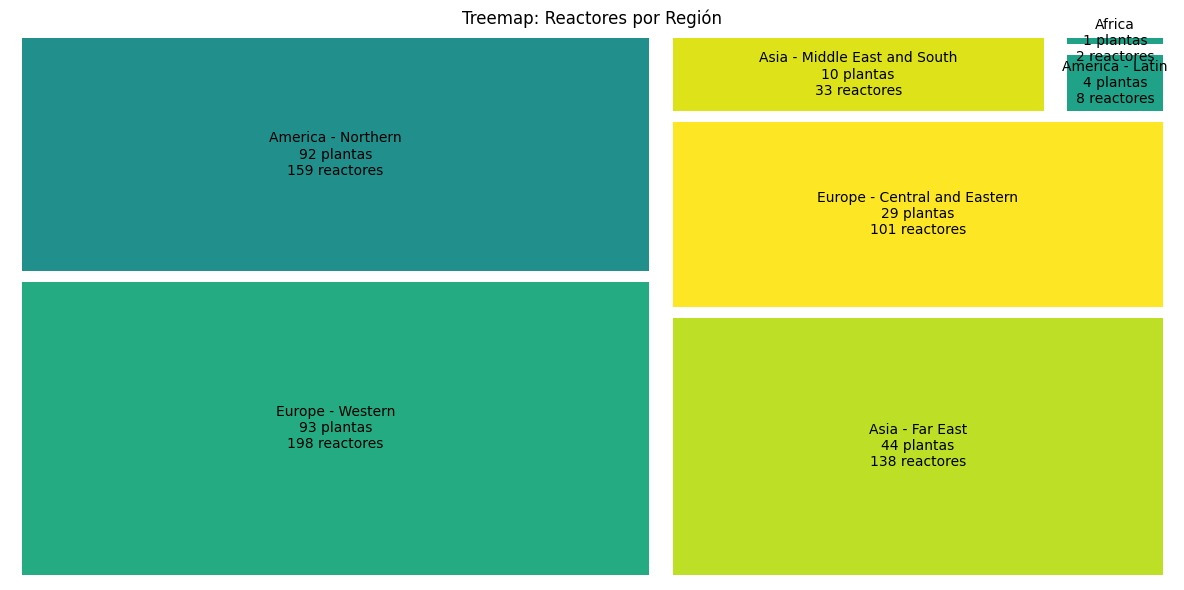

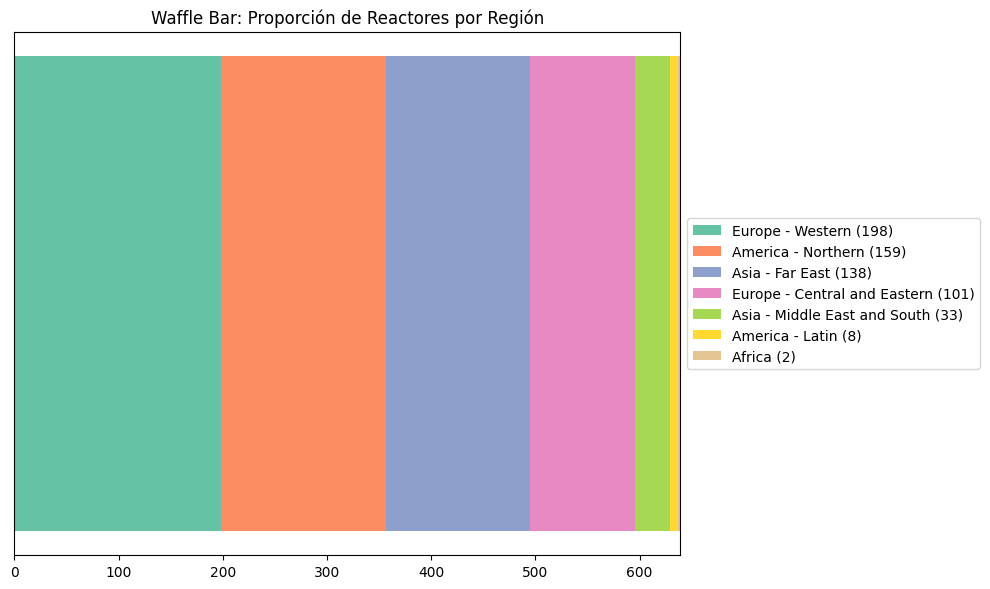

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Leer los datos
df = pd.read_csv("nuclear-power-plants.csv")

# Agrupar por región
grouped = df.groupby("region").agg(
    total_plantas=("plant", "count"),
    total_reactores=("numreactor", "sum")
).reset_index()

# Añadir eficiencia
grouped["reactores_por_planta"] = grouped["total_reactores"] / grouped["total_plantas"]
grouped = grouped.sort_values("total_reactores", ascending=False)

# --- 1. Barras agrupadas ---
fig1 = px.bar(
    grouped,
    x="region",
    y=["total_plantas", "total_reactores"],
    barmode="group",
    title="Plantas y Reactores Nucleares por Región",
    labels={"value": "Cantidad", "region": "Región", "variable": "Categoría"},
    color_discrete_sequence=["#00BFC4", "#F8766D"]
)
fig1.update_layout(xaxis_tickangle=45)
fig1.write_image("barras_agrupadas.png", width=1000, height=600)

# --- 2. Líneas con áreas sombreadas ---
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=grouped["region"],
    y=grouped["total_plantas"],
    name="Plantas",
    mode='lines+markers',
    fill='tozeroy',
    line=dict(color="#00BFC4", width=3)
))
fig2.add_trace(go.Scatter(
    x=grouped["region"],
    y=grouped["total_reactores"],
    name="Reactores",
    mode='lines+markers',
    fill='tozeroy',
    line=dict(color="#F8766D", width=3)
))
fig2.update_layout(
    title="Comparación de Plantas vs Reactores por Región",
    xaxis_title="Región",
    yaxis_title="Cantidad",
    legend_title="",
    xaxis_tickangle=45
)
fig2.write_image("lineas_sombreadas.png", width=1000, height=600)

# --- 3. Bubble chart ---
fig3 = px.scatter(
    grouped,
    x="region",
    y="total_plantas",
    size="total_reactores",
    color="reactores_por_planta",
    color_continuous_scale="Plasma",
    size_max=60,
    title="Relación Plantas vs Reactores por Región (Burbuja)",
    labels={"total_plantas": "Plantas", "total_reactores": "Reactores"}
)
fig3.update_layout(xaxis_tickangle=45)
fig3.write_image("burbuja_regiones.png", width=1000, height=600)

# --- 4. Treemap ---
plt.figure(figsize=(12, 6))
labels = [
    f"{r}\n{p} plantas\n{t} reactores"
    for r, p, t in zip(grouped["region"], grouped["total_plantas"], grouped["total_reactores"])
]
sizes = grouped["total_reactores"]
colors = plt.cm.viridis(grouped["reactores_por_planta"] / grouped["reactores_por_planta"].max())
squarify.plot(sizes=sizes, label=labels, color=colors, pad=True)
plt.title("Treemap: Reactores por Región")
plt.axis('off')
plt.tight_layout()
plt.savefig("treemap_reactores.png")

# --- 5. Waffle bar (barras tipo ladrillo) ---
fig5, ax5 = plt.subplots(figsize=(10, 6))
total_reactores = grouped["total_reactores"].sum()
colors = sns.color_palette("Set2", len(grouped))

start = 0
for i, (region, reactores) in enumerate(zip(grouped["region"], grouped["total_reactores"])):
    ax5.barh(0, reactores, left=start, color=colors[i], label=f"{region} ({reactores})")
    start += reactores

ax5.set_xlim(0, total_reactores)
ax5.set_yticks([])
ax5.set_title("Waffle Bar: Proporción de Reactores por Región")
ax5.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("waffle_bar_reactores.png")


# Ejericcio 3

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_23696\628723477.py:61: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



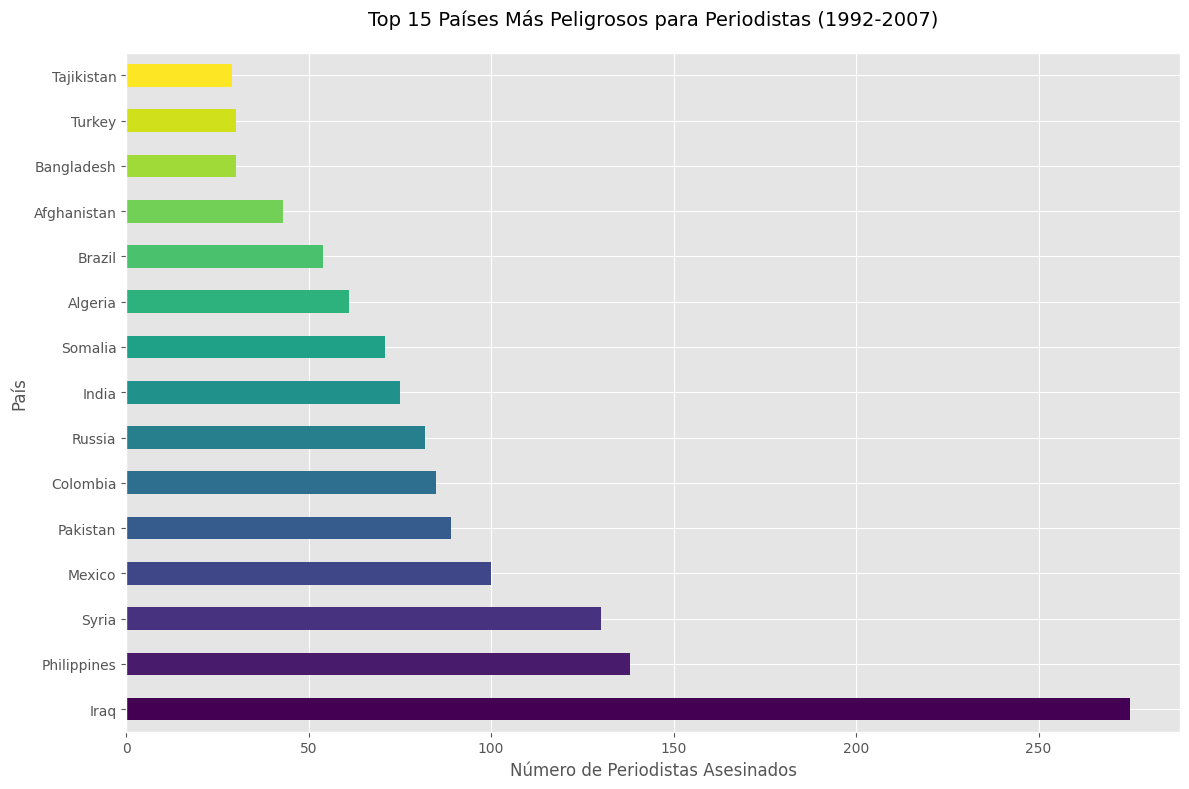

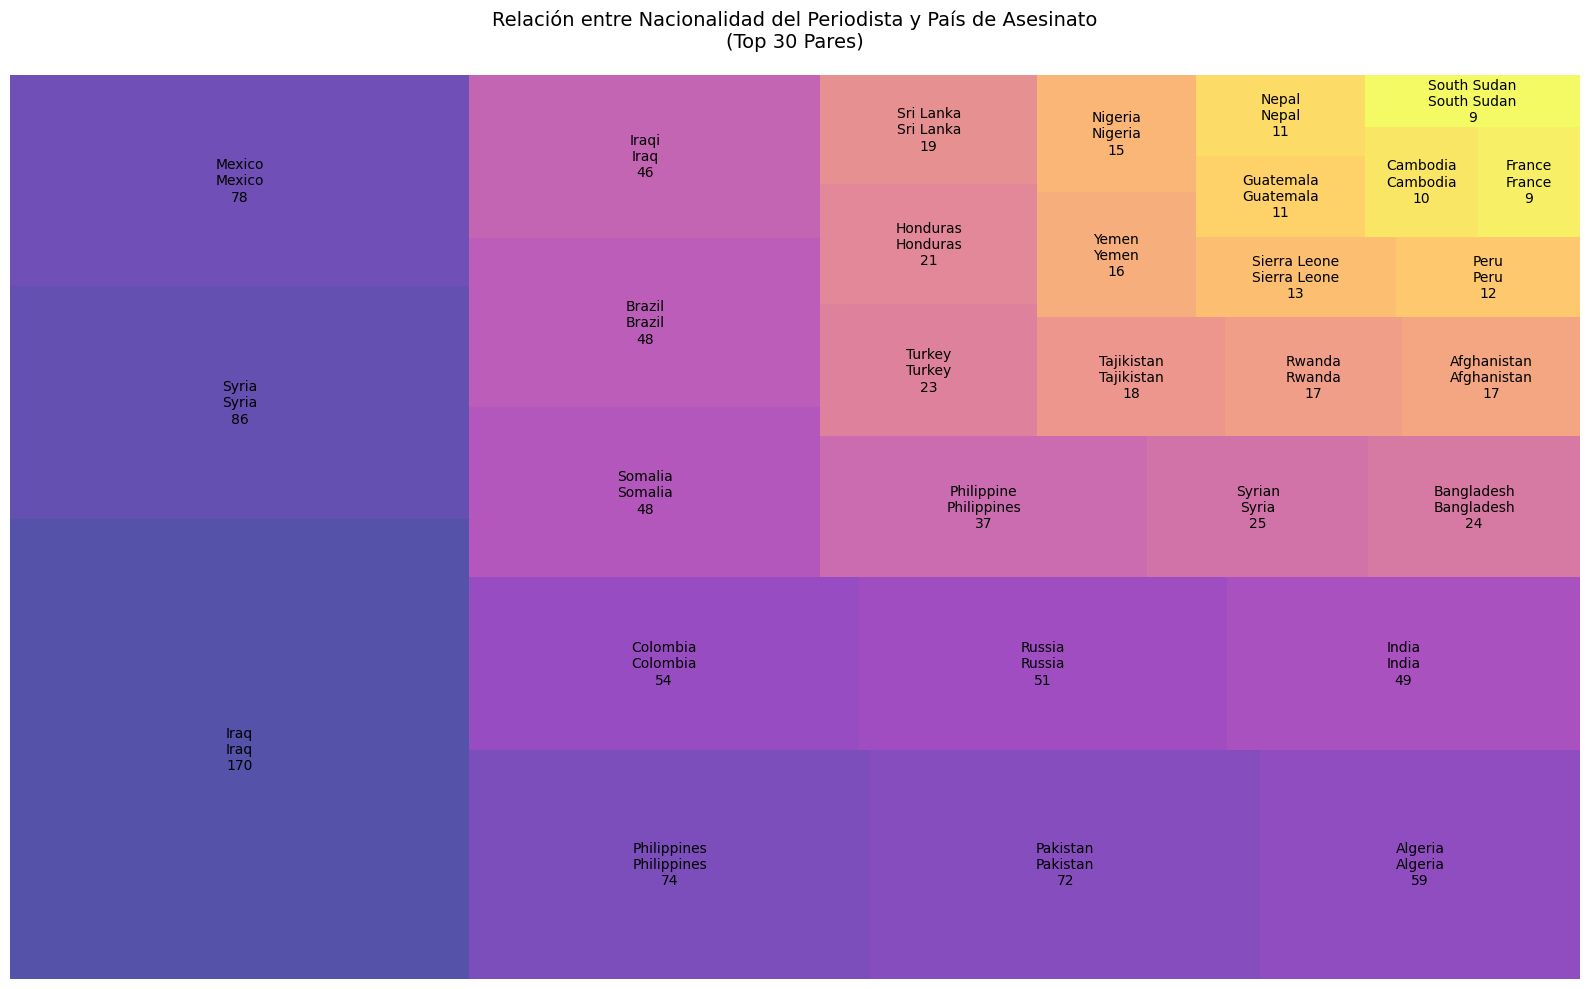

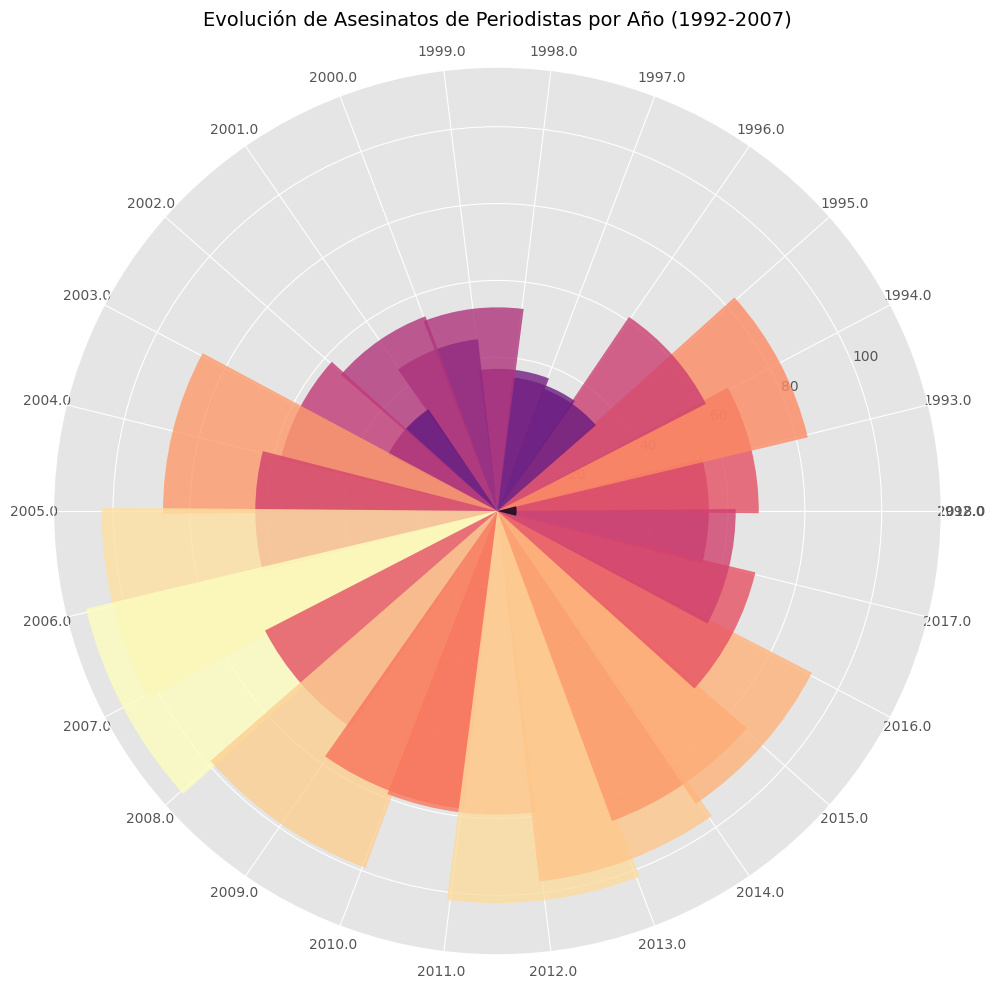

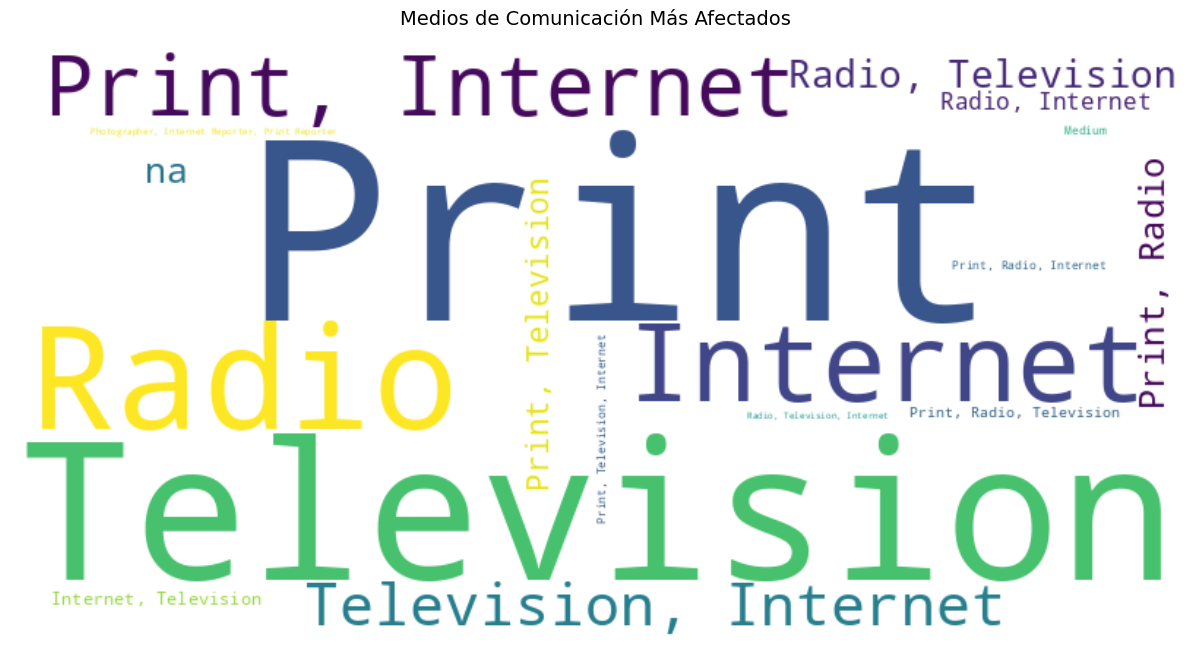

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import squarify
import numpy as np
from wordcloud import WordCloud
import chardet

# Configuración de estilo
plt.style.use('ggplot')
sns.set_palette("husl")

# Detectar la codificación del archivo
with open('cpj-database.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Leer los datos con la codificación detectada
try:
    df = pd.read_csv('cpj-database.csv', encoding=result['encoding'])
except:
    # Si falla, probar con otras codificaciones comunes
    try:
        df = pd.read_csv('cpj-database.csv', encoding='latin1')
    except:
        df = pd.read_csv('cpj-database.csv', encoding='ISO-8859-1')

# Limpieza básica de datos
df['Country Killed'] = df['Country Killed'].str.strip()
df['Nationality'] = df['Nationality'].str.strip()

# 1. Países más peligrosos (top 15)
plt.figure(figsize=(12, 8))
country_counts = df['Country Killed'].value_counts().head(15)
country_counts.plot(kind='barh', color=cm.viridis(np.linspace(0, 1, 15)))
plt.title('Top 15 Países Más Peligrosos para Periodistas (1992-2007)', fontsize=14, pad=20)
plt.xlabel('Número de Periodistas Asesinados', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.tight_layout()
plt.savefig('paises_peligrosos.png', dpi=300, bbox_inches='tight')

# 2. Relación Nacionalidad vs País de Asesinato (treemap)
cross_df = pd.crosstab(df['Nationality'], df['Country Killed']).stack().reset_index()
cross_df.columns = ['Nacionalidad', 'País Asesinato', 'Conteo']
top_pairs = cross_df.sort_values('Conteo', ascending=False).head(30)

plt.figure(figsize=(16, 10))
squarify.plot(sizes=top_pairs['Conteo'], 
              label=[f"{n}\n{p}\n{c}" for n,p,c in zip(top_pairs['Nacionalidad'], 
                                                     top_pairs['País Asesinato'], 
                                                     top_pairs['Conteo'])],
              color=cm.plasma(np.linspace(0, 1, len(top_pairs))),
              alpha=0.7)
plt.title('Relación entre Nacionalidad del Periodista y País de Asesinato\n(Top 30 Pares)', 
          fontsize=14, pad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('nacionalidad_vs_pais.png', dpi=300, bbox_inches='tight')

# 3. Evolución temporal de muertes por año (área polar)
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year
year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
theta = np.linspace(0, 2*np.pi, len(year_counts))
bars = ax.bar(theta, year_counts.values, 
              width=0.5, 
              color=cm.magma(year_counts.values/year_counts.values.max()),
              alpha=0.8)

ax.set_xticks(theta)
ax.set_xticklabels(year_counts.index)
ax.set_title('Evolución de Asesinatos de Periodistas por Año (1992-2007)', 
             pad=30, fontsize=14)
plt.tight_layout()
plt.savefig('evolucion_temporal.png', dpi=300, bbox_inches='tight')

# 4. Medios más peligrosos (nube de palabras)
medium_counts = df['Medium'].value_counts()

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white',
                      colormap='viridis').generate_from_frequencies(medium_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Medios de Comunicación Más Afectados', pad=20, fontsize=14)
plt.tight_layout()
plt.savefig('medios_peligrosos.png', dpi=300, bbox_inches='tight')

In [13]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
